# AirBnB data feature engineering

## Notebook set-up

Assume we are preparing this data for a linear regression model.

In [1]:
# Standard library imports
from itertools import product

# PyPI imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

# Internal imports
import gperdrizet_functions as funcs

# _=np.seterr(invalid='ignore')

label='availability_365'

features=[
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count'
]

## 1. Data loading

In [2]:
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
data_df.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [3]:
data_df[features].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982
std,240.154170,20.510550,44.550582,1.680442,32.952519
min,0.000000,1.000000,0.000000,0.010000,1.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000


## 2. Box-Cox transformation

In [4]:
data_df[features]=power_transform(data_df[features]+1, method='box-cox')

## 3. Standard scaling

In [5]:
scaler=StandardScaler()
data_df[features]=scaler.fit_transform(data_df[features])

## 4. Synthetic features

### 4.1. Product features

In [6]:
product_features=[]

# Create a list of unique feature pair tuples from the input list
feature_pairs=list(set(tuple(sorted(pair)) for pair in product(features, features)))

# Loop on the feature pairs to calculate their product
for feature_pair in feature_pairs:

        # Create a name for the new feature
        interaction_feature_name=f'{feature_pair[0]}X{feature_pair[1]}'

        # Add the new features to the data
        data_df[interaction_feature_name]=data_df[feature_pair[0]] * data_df[feature_pair[1]]

        # Save the interaction feature name to a list for use later
        product_features.append(interaction_feature_name)

# Get correlations for product features
feature_pairs=list(zip(product_features, [label]*len(product_features)))
correlations=funcs.get_correlations(feature_pairs, data_df)

### 4.2. Quotient features

In [7]:
quotient_features=[]

# Create a list of unique feature pair tuples from the input list
feature_pairs=list(set(tuple(pair) for pair in product(features, features)))

# Loop on the feature pairs to calculate their product
for feature_pair in feature_pairs:

    # Exclude self pairs
    if feature_pair[0] != feature_pair[1]:

        # Create a name for the new feature
        interaction_feature_name=f'{feature_pair[0]}/{feature_pair[1]}'

        # Add the new features to the data
        data_df[interaction_feature_name]=data_df[feature_pair[0]] / data_df[feature_pair[1]]

        # Save the interaction feature name to a list for use later
        quotient_features.append(interaction_feature_name)

# Get correlations for quotient features
feature_pairs=list(zip(quotient_features, [label]*len(quotient_features)))
correlations=funcs.get_correlations(feature_pairs, data_df, correlations)

### 5. Results

In [8]:
# Add cross-correlations for the original features in the dataset
feature_pairs=list(zip(features, [label]*len(features)))
correlations=funcs.get_correlations(feature_pairs, data_df, correlations)

# Convert to dataframe and sort for plotting
correlations_df=pd.DataFrame.from_dict(correlations)
correlations_df.sort_values('Absolute Spearman', ascending=False, inplace=True)
correlations_df.reset_index(inplace=True, drop=True)
correlations_df.head(len(correlations_df))

,Feature 1,Feature 2,Absolute Spearman,Spearman,Spearman p-value,Absolute Pearson,Pearson,Pearson p-value,Pearson r-squared
0,calculated_host_listings_count,availability_365,0.406606,0.406606,0.000000e+00,0.413862,0.413862,0.000000e+00,1.712821e-01
1,calculated_host_listings_countXcalculated_host...,availability_365,0.406606,0.406606,0.000000e+00,0.417804,0.417804,0.000000e+00,1.745598e-01
2,reviews_per_month,availability_365,0.392126,0.392126,0.000000e+00,0.258602,0.258602,0.000000e+00,6.687498e-02
3,reviews_per_month/calculated_host_listings_count,availability_365,0.309816,-0.309816,0.000000e+00,-0.205561,-0.205561,0.000000e+00,4.225541e-02
4,number_of_reviews,availability_365,0.236664,0.236664,0.000000e+00,0.160359,0.160359,5.828705e-279,2.571491e-02
5,number_of_reviews/calculated_host_listings_count,availability_365,0.207702,-0.207702,0.000000e+00,-0.163074,-0.163074,1.528522e-288,2.659309e-02
6,calculated_host_listings_countXreviews_per_month,availability_365,0.201886,-0.201886,0.000000e+00,-0.127660,-0.127660,8.206240e-141,1.629719e-02
7,minimum_nightsXreviews_per_month,availability_365,0.175462,-0.175462,4.145255e-266,-0.169224,-0.169224,2.112928e-247,2.863667e-02
8,calculated_host_listings_countXnumber_of_reviews,availability_365,0.165222,-0.165222,3.058781e-296,-0.166242,-0.166242,6.157824e-300,2.763649e-02
9,minimum_nights/reviews_per_month,availability_365,0.153228,-0.153228,1.081077e-202,-0.023116,-0.023116,5.205859e-06,5.343512e-04


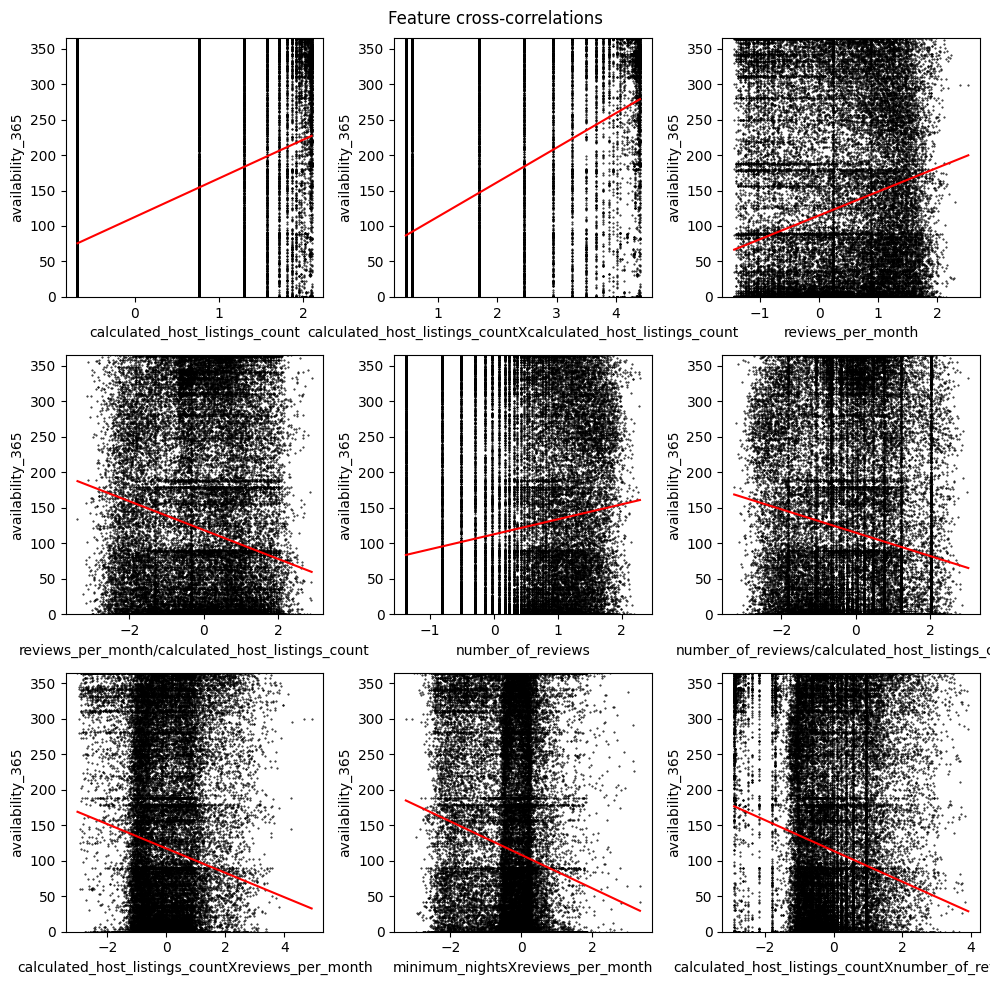

In [9]:
# Plot the top 9
fig, axs=plt.subplots(3,3, figsize=(10,10))
axs=axs.flatten()
fig.suptitle('Feature cross-correlations')

for i in range(9):

    ax=axs[i]
    row=correlations_df.iloc[i]

    # Linear regression to show on plot
    feature_pair_data=data_df[[row['Feature 1'], row['Feature 2']]].dropna()

    # Replace any infinite values with nan and then drop
    feature_pair_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    feature_pair_data.dropna(inplace=True)
    
    regression=stats.linregress(feature_pair_data.iloc[:,0], feature_pair_data.iloc[:,1])
    regression_x=np.linspace(min(feature_pair_data.iloc[:,0]), max(feature_pair_data.iloc[:,0]))
    regression_y=regression.slope*regression_x + regression.intercept

    # Draw scatter plot with regression line
    ax.scatter(data_df[row['Feature 1']], data_df[row['Feature 2']], s=0.2, color='black')
    ax.plot(regression_x, regression_y, color='red')
    ax.set_ylim(min(feature_pair_data.iloc[:,1]), max(feature_pair_data.iloc[:,1]))
    ax.set_xlabel(row['Feature 1'])
    ax.set_ylabel(row['Feature 2'])

plt.tight_layout()
plt.show()